<a href="https://colab.research.google.com/github/sayanbanerjee32/TSAI_ERAv2_S7/blob/main/step1/S7_step1_SayanBanerjee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Target:

- Complete initial set-up
 - Set Transforms
 - Set Data Loader
 - Set Basic Working Code
 - Set Basic Training and Test Loop

- Create the basic skeleton.
- Make the model lighter - as much as possible
- Add Batch-norm to increase model efficiency.

## Results:

- Parameters: 3,252
- Best Training Accuracy: 98.53
- Best Test Accuracy: 98.35

## Analysis:

- Most of epochs have shown slight overfitting
- Train and test accuracy and losses have plateaued in later epochs
- If capacity increased, the model has capability to reach 99.4

# Import all required packages including local files

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

#import from local modules
from model_1 import Net
from utils import train, test, get_device, plot_accuracy_losses

# Check if GPU available

In [2]:
# CUDA? - call get_device function defined in utils.py
is_cuda, device = get_device()

CUDA Available? True


# Train and Test transformations

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Dataset and Creating Train/Test Split

In [4]:
train_data = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders

In [5]:
# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if is_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Data Visualization

torch.Size([128, 1, 28, 28])
torch.Size([128])


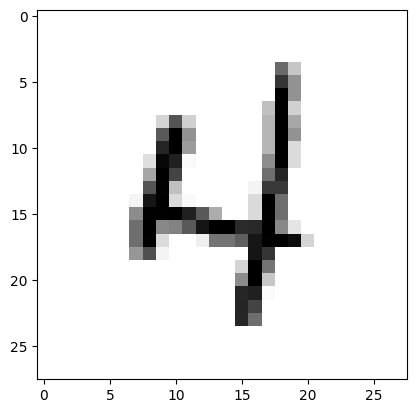

In [6]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

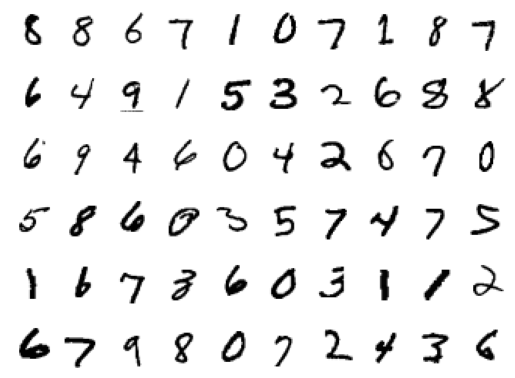

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Training

In [9]:
# visualise model parameters
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
       BatchNorm2d-2            [-1, 4, 26, 26]               8
              ReLU-3            [-1, 4, 26, 26]               0
            Conv2d-4            [-1, 8, 24, 24]             288
       BatchNorm2d-5            [-1, 8, 24, 24]              16
              ReLU-6            [-1, 8, 24, 24]               0
            Conv2d-7           [-1, 16, 22, 22]           1,152
       BatchNorm2d-8           [-1, 16, 22, 22]              32
              ReLU-9           [-1, 16, 22, 22]               0
        MaxPool2d-10           [-1, 16, 11, 11]               0
           Conv2d-11            [-1, 4, 11, 11]              64
      BatchNorm2d-12            [-1, 4, 11, 11]               8
             ReLU-13            [-1, 4, 11, 11]               0
           Conv2d-14              [-1, 

In [10]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # reduce learning rate, loss not converging

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  # call train function from utils.py
  trn_acc, trn_loss = train(model, device, train_loader, optimizer, criterion)
  # accumulate train accuracies and test losses for visualisation
  train_acc.append(trn_acc)
  train_losses.append(trn_loss)

  # call test function from utils.py
  tst_acc, tst_loss = test(model, device, test_loader, criterion)
  # accumulate test accuracies and test losses for visualisation
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)

Epoch 1


Train: Loss=0.2641 Batch_id=468 Accuracy=70.44: 100%|██████████| 469/469 [00:21<00:00, 22.08it/s]


Test set: Average loss: 0.3621, Accuracy: 9121/10000 (91.21%)

Epoch 2


Train: Loss=0.2164 Batch_id=468 Accuracy=95.31: 100%|██████████| 469/469 [00:19<00:00, 24.24it/s]


Test set: Average loss: 0.1505, Accuracy: 9642/10000 (96.42%)

Epoch 3


Train: Loss=0.0879 Batch_id=468 Accuracy=96.56: 100%|██████████| 469/469 [00:16<00:00, 28.87it/s]


Test set: Average loss: 0.1281, Accuracy: 9658/10000 (96.58%)

Epoch 4


Train: Loss=0.0589 Batch_id=468 Accuracy=97.04: 100%|██████████| 469/469 [00:16<00:00, 29.10it/s]


Test set: Average loss: 0.1057, Accuracy: 9708/10000 (97.08%)

Epoch 5


Train: Loss=0.0604 Batch_id=468 Accuracy=97.47: 100%|██████████| 469/469 [00:15<00:00, 30.20it/s]


Test set: Average loss: 0.1054, Accuracy: 9682/10000 (96.82%)

Epoch 6


Train: Loss=0.0384 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:15<00:00, 30.00it/s]


Test set: Average loss: 0.0925, Accuracy: 9720/10000 (97.20%)

Epoch 7


Train: Loss=0.0333 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:16<00:00, 28.78it/s]


Test set: Average loss: 0.0747, Accuracy: 9783/10000 (97.83%)

Epoch 8


Train: Loss=0.0408 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:15<00:00, 29.71it/s]


Test set: Average loss: 0.0699, Accuracy: 9801/10000 (98.01%)

Epoch 9


Train: Loss=0.1140 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:17<00:00, 27.21it/s]


Test set: Average loss: 0.0675, Accuracy: 9799/10000 (97.99%)

Epoch 10


Train: Loss=0.0768 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:15<00:00, 29.47it/s]


Test set: Average loss: 0.0731, Accuracy: 9791/10000 (97.91%)

Epoch 11


Train: Loss=0.0318 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:15<00:00, 29.62it/s]


Test set: Average loss: 0.0747, Accuracy: 9786/10000 (97.86%)

Epoch 12


Train: Loss=0.1207 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:16<00:00, 28.80it/s]


Test set: Average loss: 0.0637, Accuracy: 9815/10000 (98.15%)

Epoch 13


Train: Loss=0.0552 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:17<00:00, 26.88it/s]


Test set: Average loss: 0.0582, Accuracy: 9835/10000 (98.35%)

Epoch 14


Train: Loss=0.0126 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:19<00:00, 24.23it/s]


Test set: Average loss: 0.0581, Accuracy: 9824/10000 (98.24%)

Epoch 15


Train: Loss=0.0416 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:16<00:00, 27.66it/s]


Test set: Average loss: 0.0701, Accuracy: 9791/10000 (97.91%)



## Visualise training and test losses and accuracies

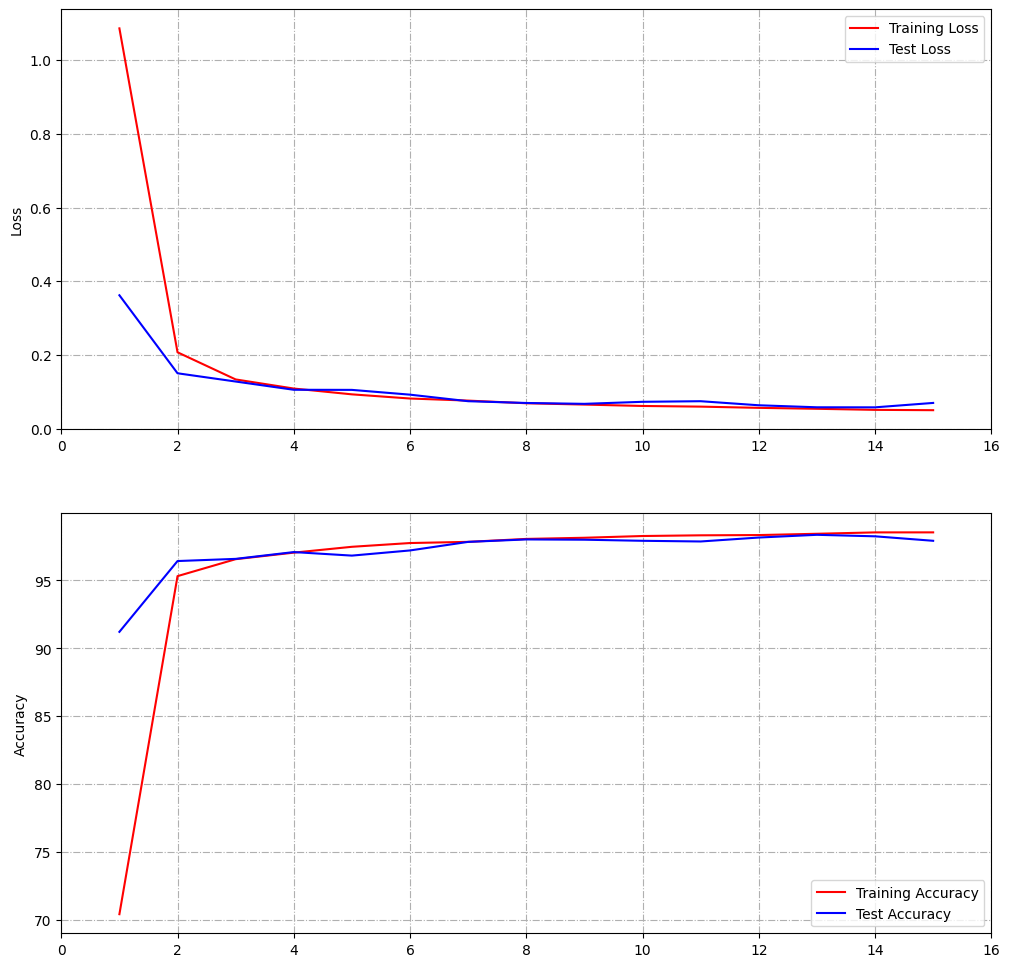

In [12]:
## use function from utils.py
plot_accuracy_losses(train_losses, train_acc, test_losses, test_acc, num_epochs)